Loading and First Look

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

Basic dataset Information

In [15]:
df.shape

(102, 8)

In [16]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [17]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


Data Quality Assessment

Check data types and missing values

In [18]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [19]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


Check for duplicates

In [20]:
df.duplicated().sum()

np.int64(0)

Basic statistics

In [21]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


Data Preprocessing

In [22]:
df.columns=df.columns.str.strip()

Convert Entry columns to datetime

In [23]:
df['Entry_Date']=pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_YEar']=df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_YEar
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [24]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_YEar,int32


Create valuating growth metric

In [25]:
df['Valuation_Growth']=df['Valuation ($B)']/df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_YEar,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


Extract primary city(before'/')

In [26]:
df['Investor_Count']=df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_YEar,Valuation_Growth,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,4


Count number of investors

In [27]:
df['Investor_Count']=df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_YEar,Valuation_Growth,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,4


Univariate Analysis


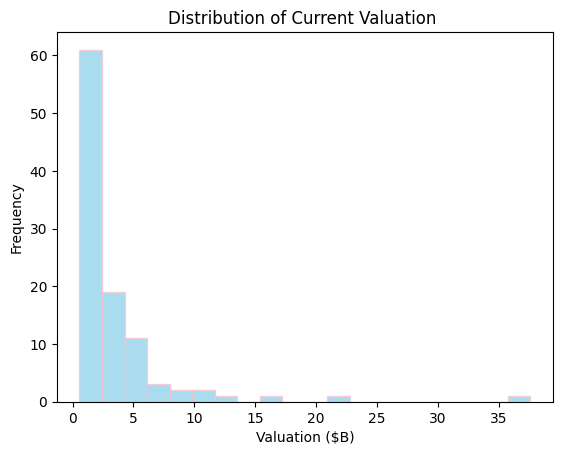

In [28]:
plt.hist(df['Valuation ($B)'],bins=20,alpha=0.7,color='skyblue',edgecolor='pink')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.title('Distribution of Current Valuation ')
plt.show()

Selector distribution

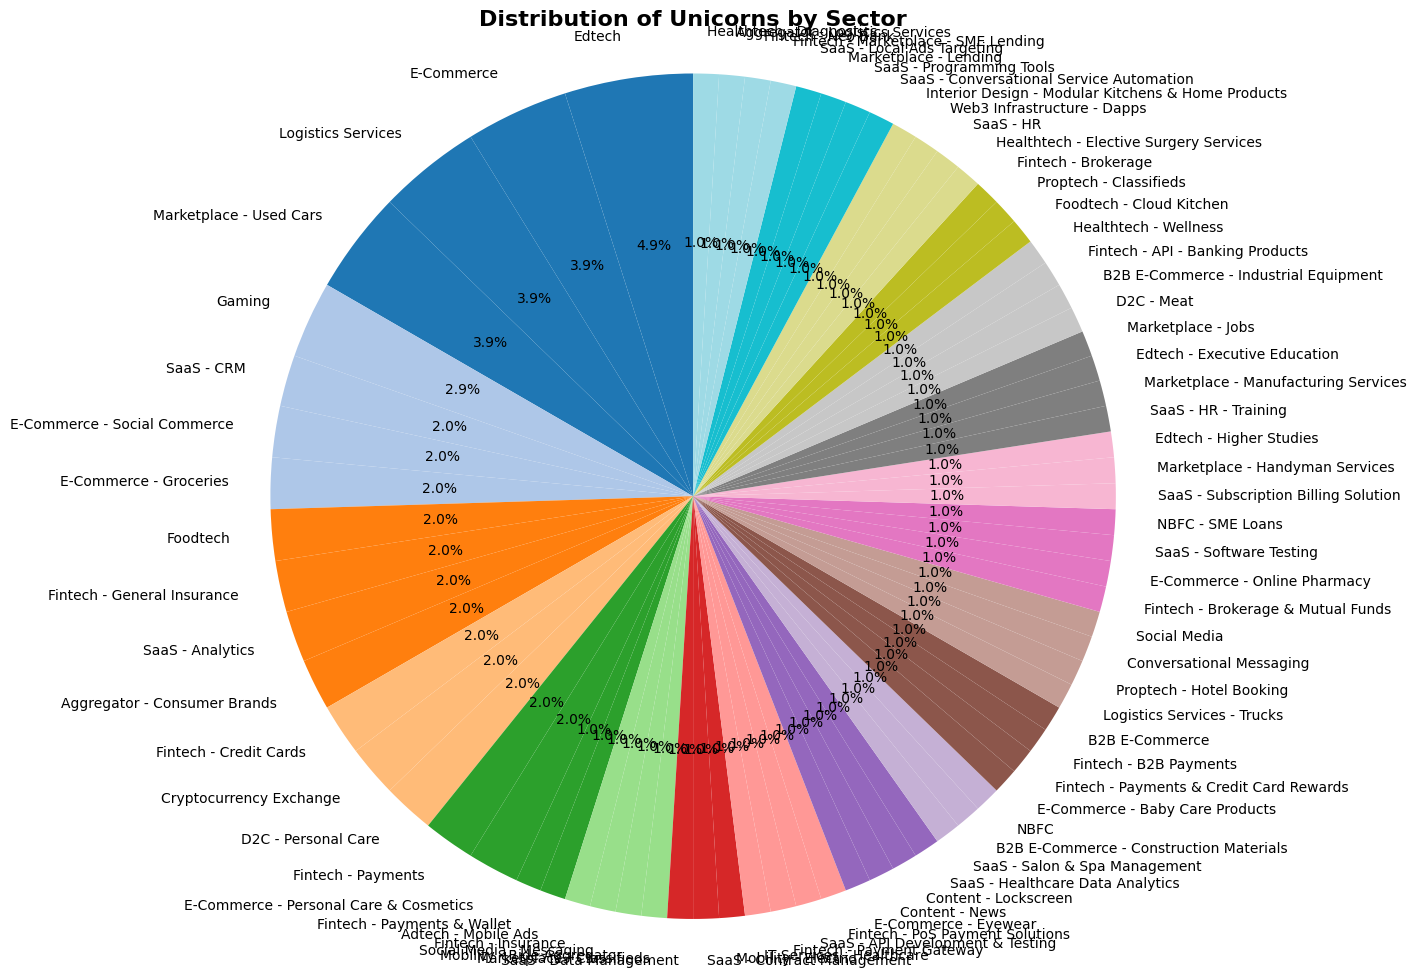

In [29]:
plt.figure(figsize=(12, 12))

sector_counts = df['Sector'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(sector_counts)))

plt.pie(sector_counts.values, labels=sector_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Unicorns by Sector', fontsize=16, fontweight='bold')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

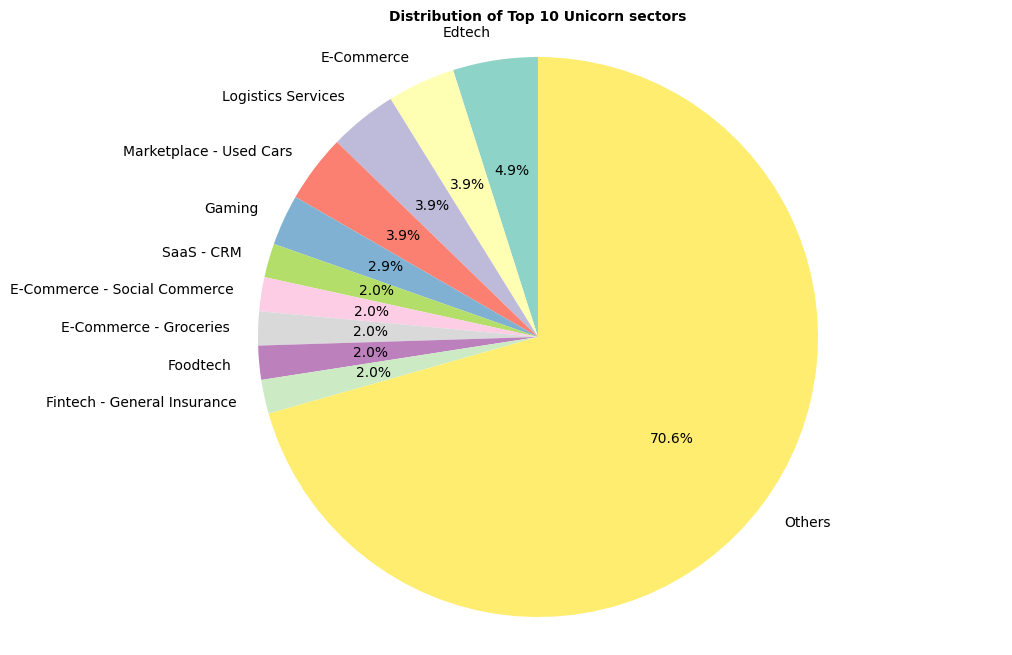

In [30]:
def display_top_k_sectors(df,k):
  sector_counts=df['Sector'].value_counts()

  # Select top K sectors and group the rest as 'Others'
  if k<len(sector_counts):
    top_sectors=sector_counts.head(k)
    other_sectors_count=sector_counts.iloc[k:].sum()
    top_sectors['Others']=other_sectors_count
  else:
    top_sectors=sector_counts

  plt.figure(figsize=(12,8))
  colors=plt.cm.Set3(np.linspace(0,1,len(top_sectors)))
  plt.pie(top_sectors.values,labels=top_sectors.index,autopct='%1.1f%%',colors=colors,startangle=90)
  plt.title(f'Distribution of Top {k} Unicorn sectors',fontsize=10,fontweight='bold')
  plt.axis('equal')
  plt.show()

# Call the function with K=5 to display top 5 Sectors
display_top_k_sectors(df,10)

Top sectors chart

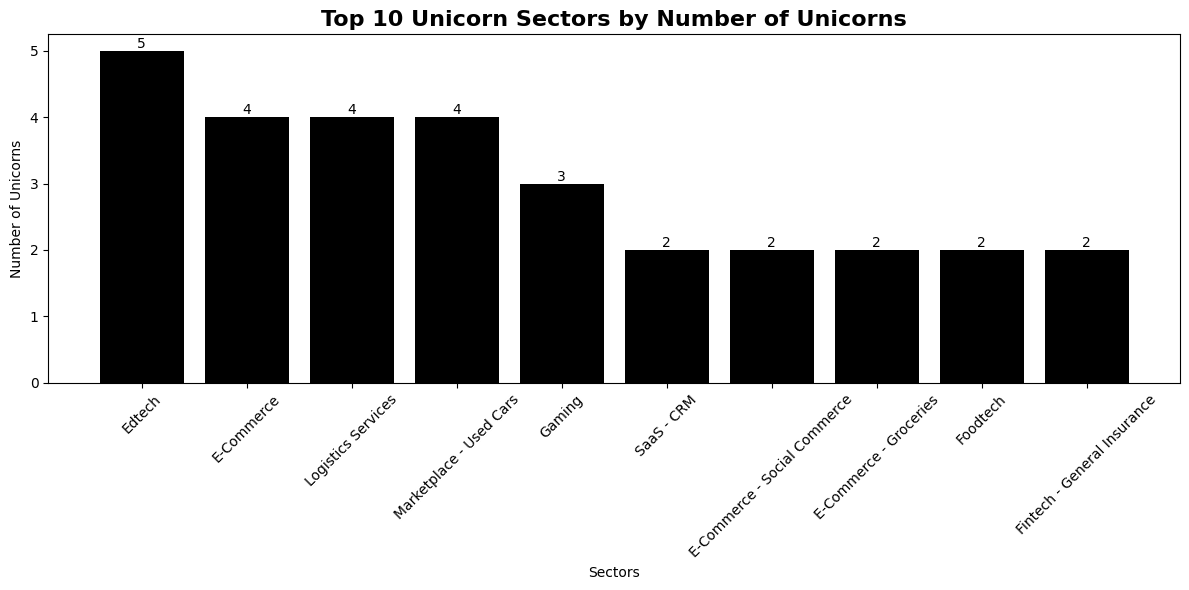

In [31]:
plt.figure(figsize=(12,6))
top_sectors=sector_counts.head(10)
bars=plt.bar(range(len(top_sectors)),top_sectors.values,color='black')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,ha='center')
plt.xlabel('Sectors')
plt.ylabel('Number of Unicorns')
plt.title('Top 10 Unicorn Sectors by Number of Unicorns',fontsize=16,fontweight='bold')

#Add value labels on bars
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

Geographic Distribution

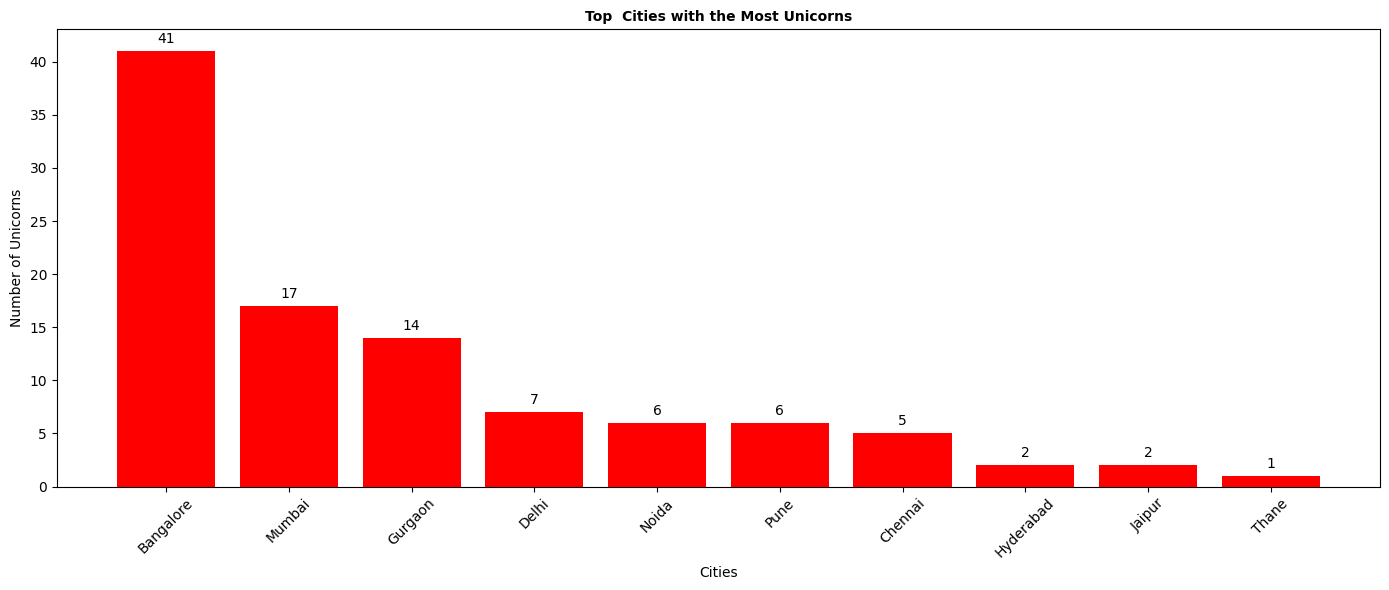

In [34]:
df['Primary_City']=df['Location'].apply(lambda x:x.split('/')[0]if isinstance(x,str)else x)

plt.figure(figsize=(14,6))
city_counts=df['Primary_City'].value_counts().head(10)
bars=plt.bar(city_counts.index,city_counts.values,color='red')
plt.title('Top  Cities with the Most Unicorns',fontsize=10,fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)

#Add value labels
for bar,value in zip(bars,city_counts.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

In [35]:
city_summary=df.groupby('Primary_City').agg({'Valuation ($B)':['count','sum','mean'],'Entry_YEar':['min','max']}).round(2)
city_summary.columns=['count','Total_Valuation','Average_Valuation','First_Entry','Last_Entry']
display(city_summary.head())

,count,Total_Valuation,Average_Valuation,First_Entry,Last_Entry
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022


Temporal Analysis

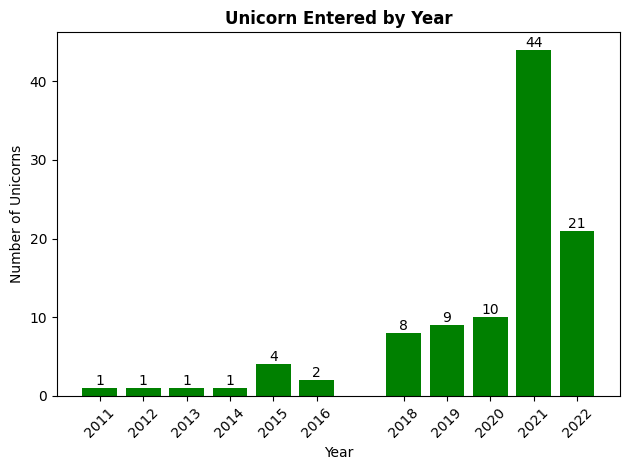

In [36]:
yearly_entries=df['Entry_YEar'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='green')
plt.title('Unicorn Entered by Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

#Add value labels
for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

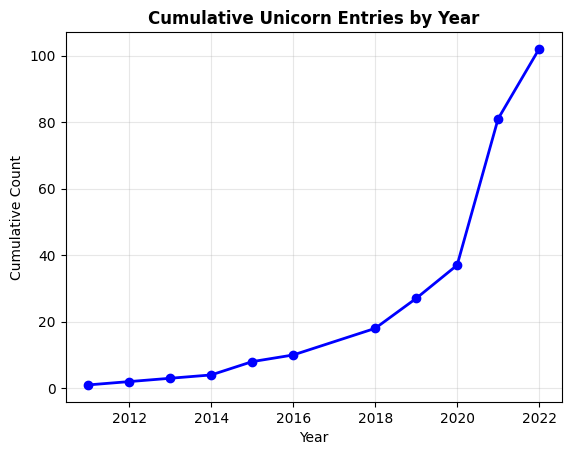

In [37]:
cumulative=yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linewidth=2,color='blue')
plt.title('Cumulative Unicorn Entries by Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True,alpha=0.3)
plt.show()

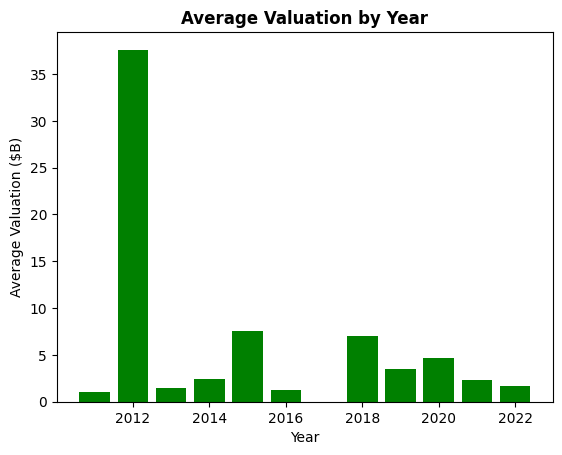

In [38]:
avg_val_by_year=df.groupby('Entry_YEar')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='green')
plt.title('Average Valuation by Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

Selector evaluation over time

In [39]:
def display_k_sector_evalution(df,k):
 # Group by year and sector,count occurences
 sector_year=df.groupby(['Entry_YEar','Sector']).size().unstack(fill_value=0)

 #Select top k sectors based on overall count
 top_k_sectors_names=df['Sector'].value_counts().head(k).index.tolist()

 sector_year=sector_year[top_k_sectors_names]

 plt.figure(figsize=(15,8))
 sector_year.plot(kind='bar',alpha=0.7, ax=plt.gca())
 plt.title(f'Evalution of Top {k} Sectors Over Time',fontsize=16,fontweight='bold')
 plt.xlabel('Year')
 plt.ylabel('Number of Unicorns')
 plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
 plt.yticks(range(0,sector_year.values.max()+1,5))
 plt.grid(True,alpha=0.3)
 plt.tight_layout()
 plt.show()

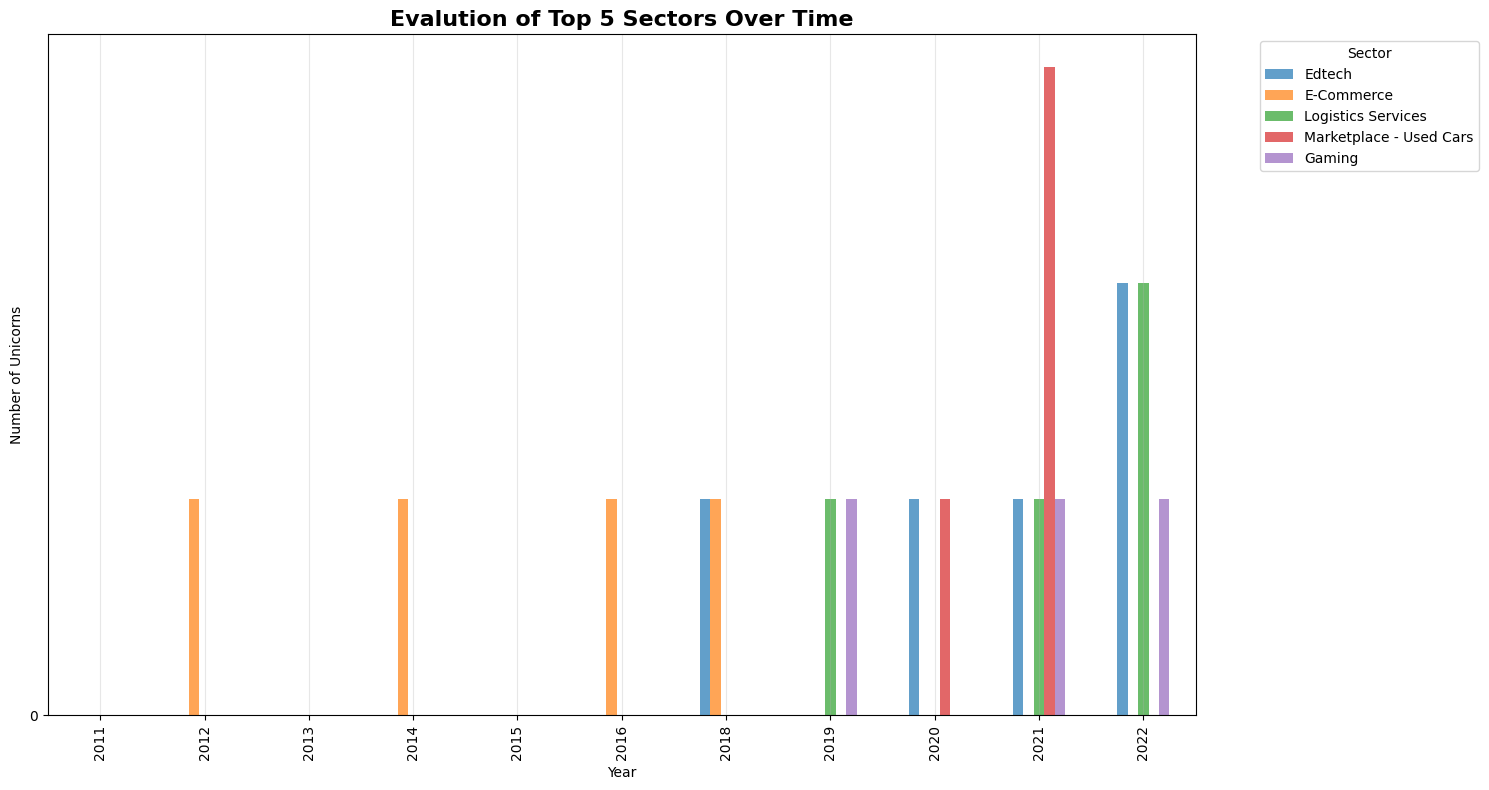

In [ ]:
#Calls the function with K=5
display_k_sector_evalution(df,5)

Valuation Sector Analysis

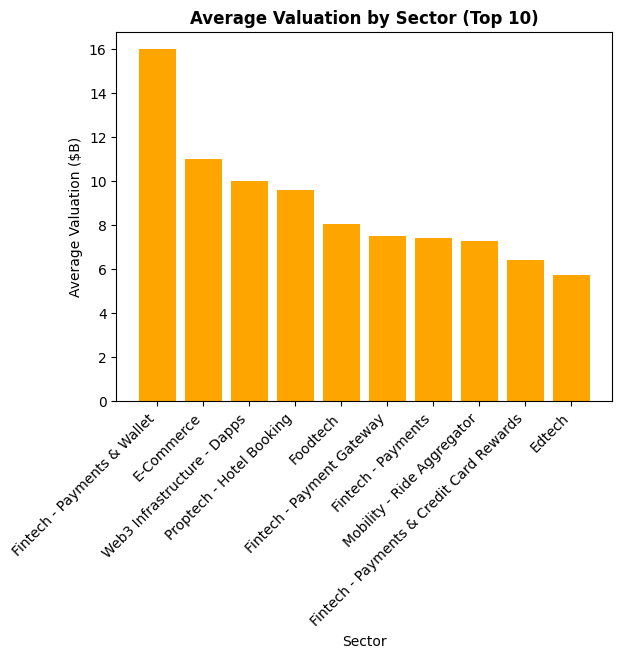

In [41]:
avg_valuation=df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation=avg_valuation.sort_values(ascending=False).head(10)

bars=plt.bar(avg_valuation.index,avg_valuation.values,color='orange')
plt.title('Average Valuation by Sector (Top 10)',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)),avg_valuation.index,rotation=45,ha='right')
plt.show()

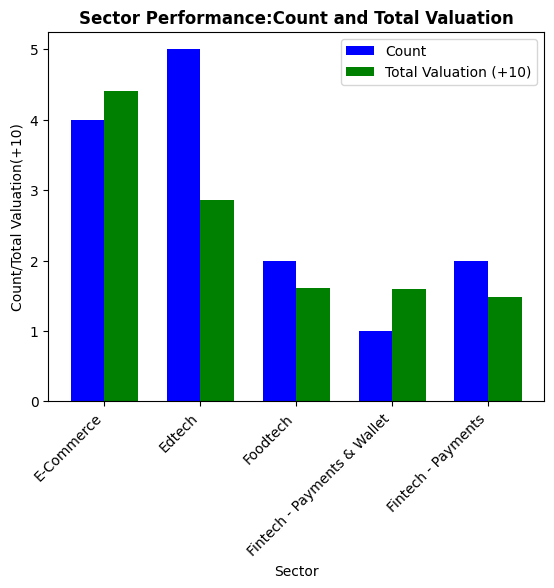

In [43]:
sector_summary=df.groupby('Sector').agg({'Valuation ($B)':['count','sum']}).round(2)
sector_summary.columns=['count','Total_Valuation']
sector_summary=sector_summary.sort_values('Total_Valuation',ascending=False).head()

x=np.arange(len(sector_summary))
width=0.35

plt.bar(x - width/2,sector_summary['count'],width,label='Count',color='blue')
plt.bar(x + width/2,sector_summary['Total_Valuation']/10,width,label='Total Valuation (+10)',color='green')
plt.title('Sector Performance:Count and Total Valuation',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Count/Total Valuation(+10)')
plt.xticks(x,sector_summary.index,rotation=45,ha='right')
plt.legend()
plt.show()

Average valuation by city

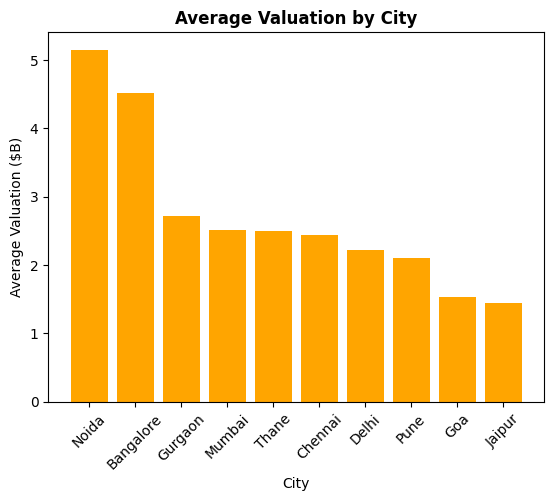

In [45]:
city_valuation=df.groupby('Primary_City')['Valuation ($B)'].mean()
city_valuation=city_valuation.sort_values(ascending=False).head(10)

bars=plt.bar(city_valuation.index,city_valuation.values,color='orange')
plt.title('Average Valuation by City',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

city vs count vs total valuation

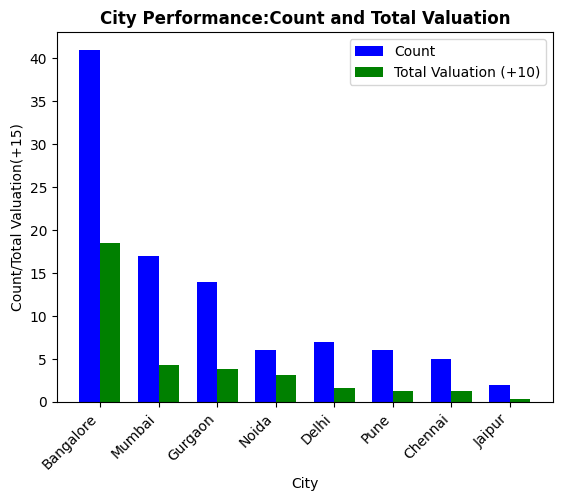

In [47]:
city_summary=df.groupby('Primary_City').agg({'Valuation ($B)':['count','sum']}).round(2)
city_summary.columns=['count','Total_Valuation']
city_summary=city_summary.sort_values('Total_Valuation',ascending=False).head(8)

x=np.arange(len(city_summary))
width=0.35

plt.bar(x - width/2,city_summary['count'],width,label='Count',color='blue')
plt.bar(x + width/2,city_summary['Total_Valuation']/10,width,label='Total Valuation (+10)',color='green')
plt.title('City Performance:Count and Total Valuation',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count/Total Valuation(+15)')
plt.xticks(x,city_summary.index,rotation=45,ha='right')
plt.legend()
plt.show()

Number of inverse vs valuation

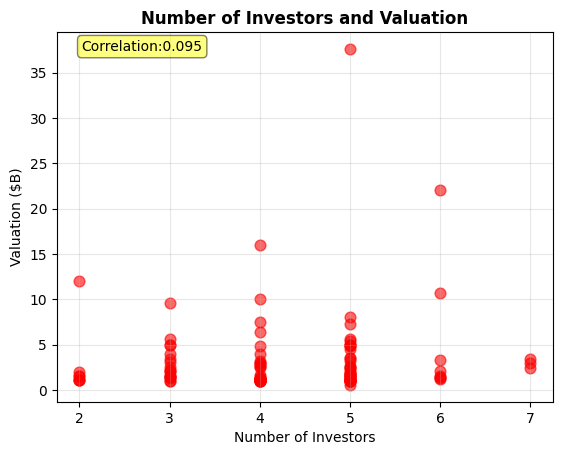

In [49]:
plt.scatter(df['Investor_Count'],df['Valuation ($B)'],alpha=0.6,s=60,color='red')
plt.title('Number of Investors and Valuation',fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.grid(True,alpha=0.3)

correlation_coefficient=df['Investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05,0.95,f'Correlation:{correlation_coefficient:.3f}',transform=plt.gca().transAxes,bbox=dict(boxstyle="round,pad=0.3",facecolor="yellow",alpha=0.5))
plt.show()

Model active investors

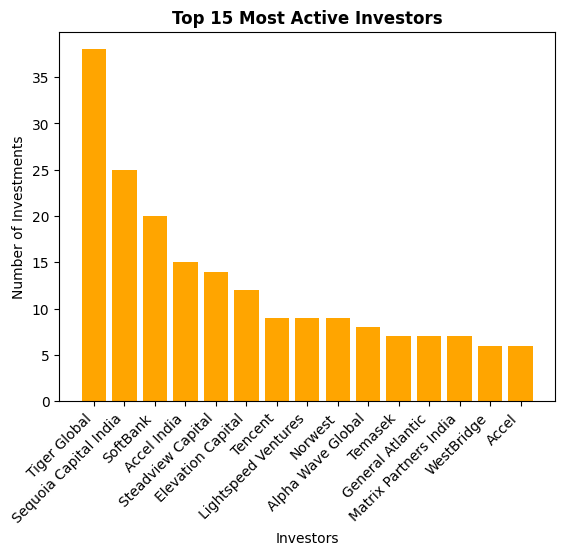

In [50]:
all_investors=[]
for investors in df['Select Investors'].dropna():
  all_investors.extend(inv.strip()for inv in investors.split(','))

investor_counts=pd.Series(all_investors).value_counts().head(15)
bars=plt.bar(range(len(investor_counts)),investor_counts.values,color='orange')
plt.title('Top 15 Most Active Investors',fontweight='bold')
plt.xlabel('Investors')
plt.ylabel('Number of Investments')
plt.xticks(range(len(investor_counts)),investor_counts.index,rotation=45,ha='right')
plt.show()

Entry year vs investor count

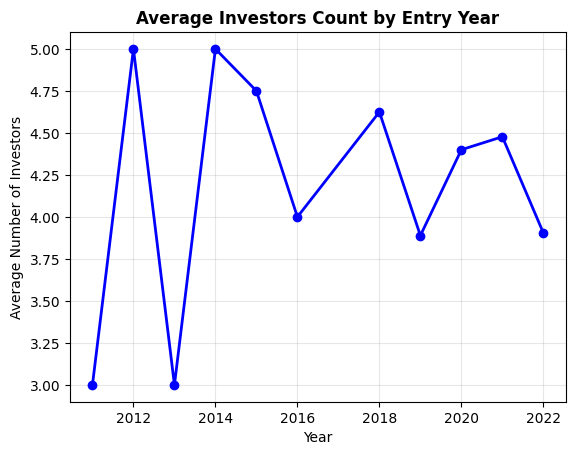

In [52]:
year_investor=df.groupby('Entry_YEar')['Investor_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',linewidth=2,markersize=6,color='blue')
plt.title('Average Investors Count by Entry Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Number of Investors')
plt.grid(True,alpha=0.3)
plt.show()

Investor Count distribution

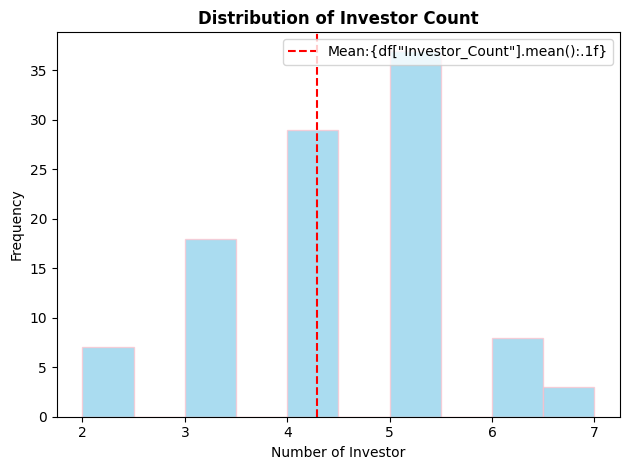

In [53]:
plt.hist(df['Investor_Count'],bins=10,alpha=0.7,color='skyblue',edgecolor='pink')
plt.title('Distribution of Investor Count',fontweight='bold')
plt.xlabel('Number of Investor')
plt.ylabel('Frequency')
plt.axvline(df['Investor_Count'].mean(),color='red',linestyle='--',label='Mean:{df["Investor_Count"].mean():.1f}')
plt.legend()

plt.tight_layout()
plt.show()

Valuation trends over time